In [ ]:
Título e Introdução

# **Trabalho Final - AAS**
## Predição de Índice de Experimentação de Substâncias

### 1. Definição do Problema
Este projeto pretende desenvolver um modelo **supervisionado** para prever se um jovem (ou grupo) apresenta índice de experimentação de substâncias (`Drug_Experimentation`) com base em variáveis socioeconômicas, demográficas e comportamentais. A ideia central é identificar fatores determinantes e compreender o fenômeno, auxiliando assim na formulação de **políticas públicas** ou intervenções de saúde.

O dataset (por exemplo, `Youth_Smoking_Drug.csv`) contém colunas relacionadas a idade, gênero, status socioeconômico, possíveis escores de comportamento, etc. O alvo é uma variável binária indicando experimentação de drogas (`0` ou `1`).

**Objetivos**:
- Realizar Data Wrangling para limpar e preparar os dados.
- Explorar estatisticamente (EDA) para entender correlações e distribuições.
- Implementar **6 algoritmos** de ML (5 tradicionais + 1 ANN).
- Usar **2 métodos** de tuning de hiperparâmetros (GridSearchCV e RandomizedSearchCV).
- Avaliar performance (acurácia, F1 etc.), discutir resultados e conclusões.



### 2. Importando Bibliotecas
Utilizaremos apenas Pandas, NumPy, Seaborn, Matplotlib e Scikit-Learn, e Keras (TensorFlow) para redes neurais.


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Modelos de Regressão
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Regressor que está no scikit? Naive Bayes não é regressão. Então 6o modelo poderia ser??? 
# Podemos usar "DecisionTreeRegressor" e "KNeighborsRegressor" e "RandomForestRegressor", "LinearRegression", "SVR", 
# e "ANN" (Keras).
# Assim total: 5 + 1ANN.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

plt.rcParams['figure.figsize'] = (10,6)

### 3. Carregamento e Descrição do Dataset

Aqui, carregamos o arquivo CSV `Youth_Smoking_Drug.csv` (exemplo). Ajuste conforme o seu dataset real.


In [60]:
# Ajuste para o nome real do seu arquivo CSV
df = pd.read_csv("dataset.csv")  
df.head()

,Year,Age_Group,Gender,Smoking_Prevalence,Drug_Experimentation,Socioeconomic_Status,Peer_Influence,School_Programs,Family_Background,Mental_Health,Access_to_Counseling,Parental_Supervision,Substance_Education,Community_Support,Media_Influence
0,2024,15-19,Both,18.85,32.40,High,5,Yes,1,5,No,4,No,3,1
1,2024,10-14,Female,34.88,41.57,High,6,Yes,10,5,No,9,Yes,9,3
2,2024,40-49,Both,33.75,42.90,Middle,10,No,9,7,Yes,2,No,10,9
3,2024,25-29,Male,37.71,19.46,Low,5,Yes,2,4,Yes,1,No,10,8
4,2024,15-19,Female,24.61,39.62,Middle,10,No,8,4,Yes,8,No,6,8


#### Info e Estatísticas Descritivas


In [61]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  10000 non-null  int64  
 1   Age_Group             10000 non-null  object 
 2   Gender                10000 non-null  object 
 3   Smoking_Prevalence    10000 non-null  float64
 4   Drug_Experimentation  10000 non-null  float64
 5   Socioeconomic_Status  10000 non-null  object 
 6   Peer_Influence        10000 non-null  int64  
 7   School_Programs       10000 non-null  object 
 8   Family_Background     10000 non-null  int64  
 9   Mental_Health         10000 non-null  int64  
 10  Access_to_Counseling  10000 non-null  object 
 11  Parental_Supervision  10000 non-null  int64  
 12  Substance_Education   10000 non-null  object 
 13  Community_Support     10000 non-null  int64  
 14  Media_Influence       10000 non-null  int64  
dtypes: float64(2), int64

,Year,Smoking_Prevalence,Drug_Experimentation,Peer_Influence,Family_Background,Mental_Health,Parental_Supervision,Community_Support,Media_Influence
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2022.000500,27.439257,40.150182,5.440100,5.513300,5.469800,5.528000,5.544600,5.506200
std,1.425027,12.975528,17.515917,2.863151,2.865038,2.879326,2.891514,2.870302,2.872836
min,2020.000000,5.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2021.000000,16.160000,24.920000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2022.000000,27.355000,40.100000,5.000000,6.000000,5.000000,6.000000,6.000000,6.000000
75%,2023.000000,38.672500,55.462500,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,2024.000000,50.000000,69.990000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


### 5. Data Wrangling

Verificamos valores ausentes, colunas irrelevantes, outliers etc.


In [62]:
# Valores ausentes
print(df.isna().sum())

# Exemplo de remoção/imputação
# df.dropna(inplace=True) 
# ou df['col'].fillna(df['col'].mean())

# Ajuste colunas irrelevantes se houver
# df.drop(['ID','NomeQualquer'], axis=1, inplace=True)

df.head()


Year                    0
Age_Group               0
Gender                  0
Smoking_Prevalence      0
Drug_Experimentation    0
Socioeconomic_Status    0
Peer_Influence          0
School_Programs         0
Family_Background       0
Mental_Health           0
Access_to_Counseling    0
Parental_Supervision    0
Substance_Education     0
Community_Support       0
Media_Influence         0
dtype: int64


,Year,Age_Group,Gender,Smoking_Prevalence,Drug_Experimentation,Socioeconomic_Status,Peer_Influence,School_Programs,Family_Background,Mental_Health,Access_to_Counseling,Parental_Supervision,Substance_Education,Community_Support,Media_Influence
0,2024,15-19,Both,18.85,32.40,High,5,Yes,1,5,No,4,No,3,1
1,2024,10-14,Female,34.88,41.57,High,6,Yes,10,5,No,9,Yes,9,3
2,2024,40-49,Both,33.75,42.90,Middle,10,No,9,7,Yes,2,No,10,9
3,2024,25-29,Male,37.71,19.46,Low,5,Yes,2,4,Yes,1,No,10,8
4,2024,15-19,Female,24.61,39.62,Middle,10,No,8,4,Yes,8,No,6,8


### 6. Exploratory Data Analysis (EDA)

Vamos checar distribuições e correlações.


In [ ]:
Célula Code: EDA 1

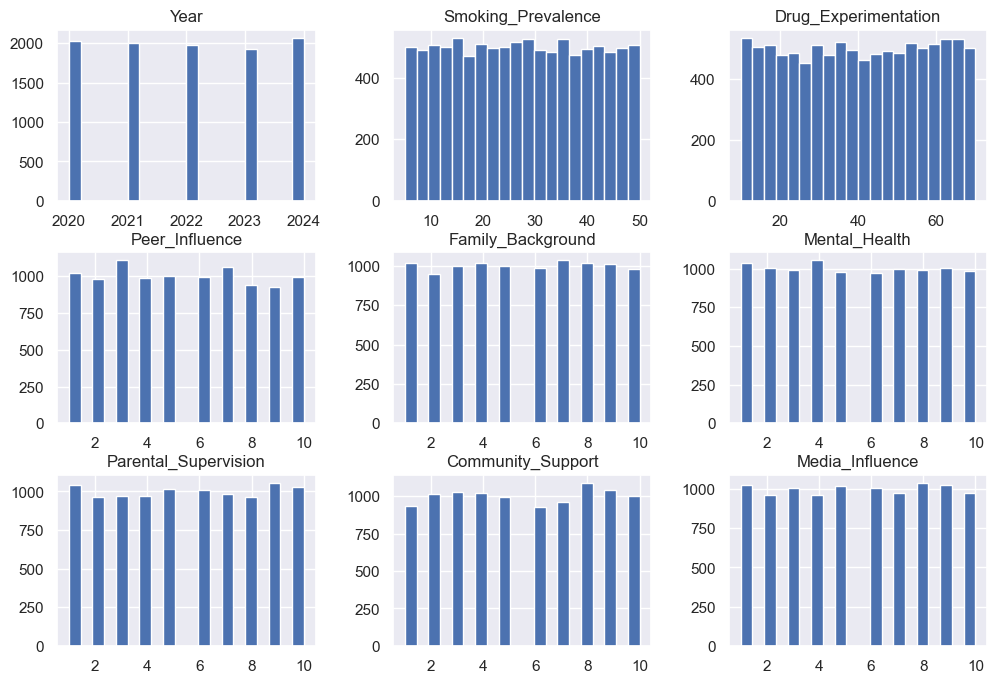

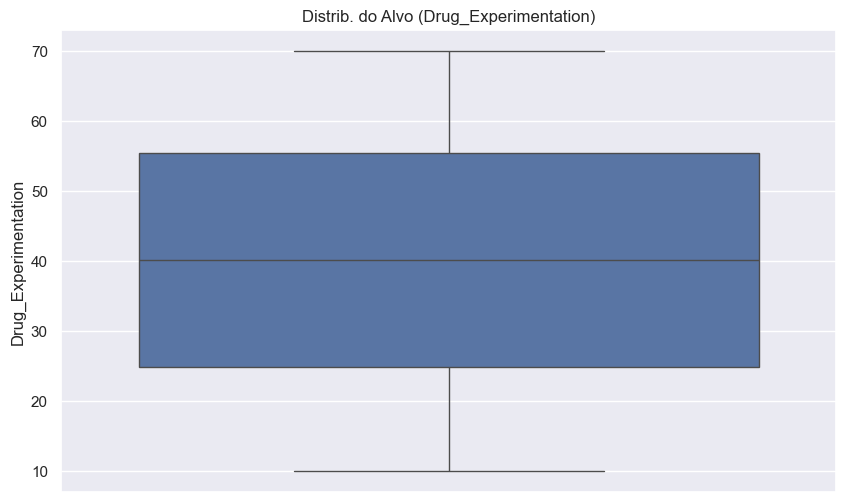

In [63]:
df.hist(bins=20, figsize=(12,8))
plt.show()

# Boxplot do alvo
sns.boxplot(y='Drug_Experimentation', data=df)
plt.title('Distrib. do Alvo (Drug_Experimentation)')
plt.show()

In [ ]:
EDA 2 (Correlação)

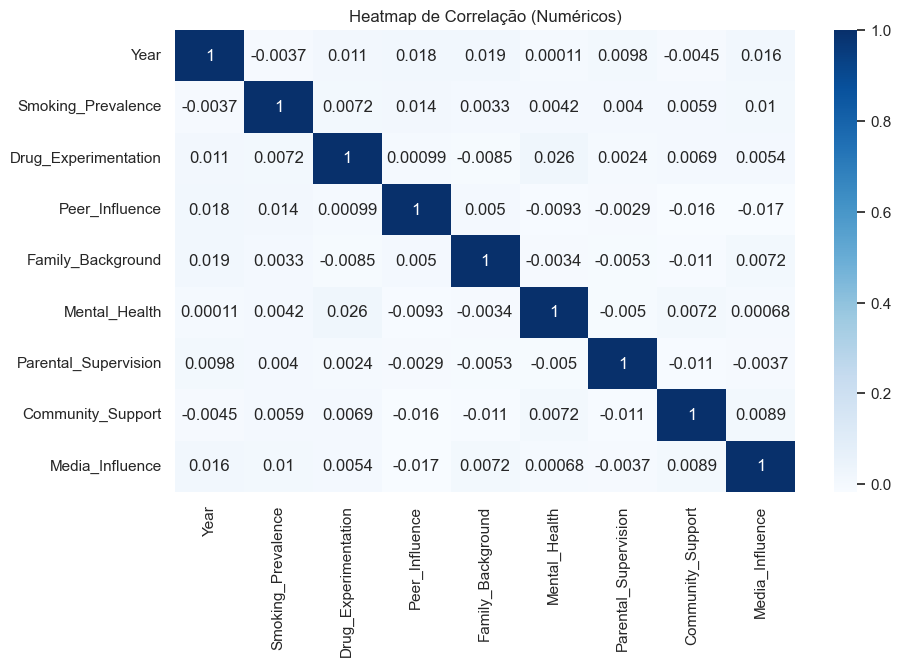

In [64]:
# Somente colunas numéricas:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Heatmap de Correlação (Numéricos)')
plt.show()

In [ ]:
EDA 3 (exemplo)

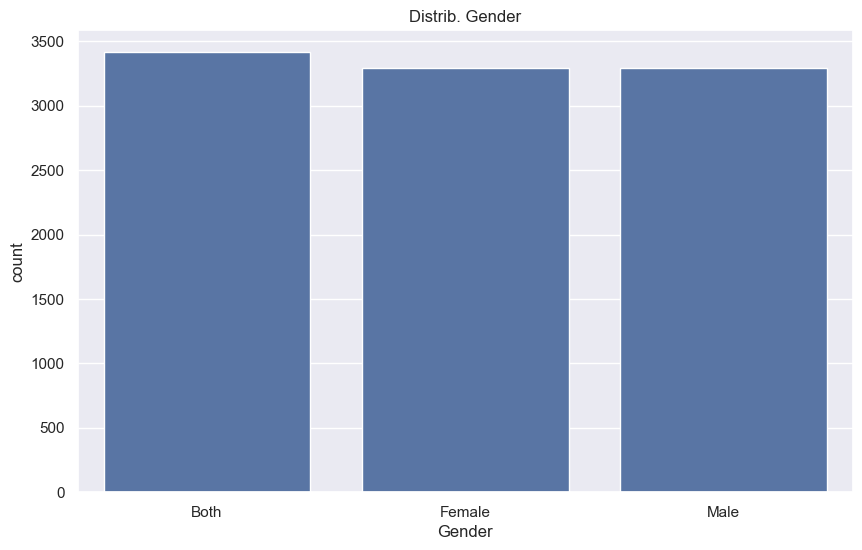

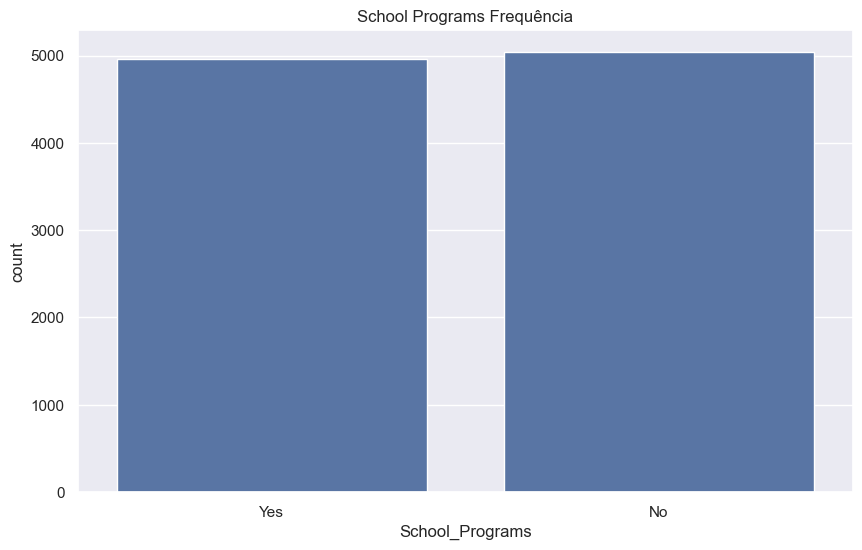

In [65]:
# Relação de colunas categóricas ex: Gender, School_Programs
sns.countplot(x='Gender', data=df)
plt.title('Distrib. Gender')
plt.show()

sns.countplot(x='School_Programs', data=df)
plt.title('School Programs Frequência')
plt.show()


In [ ]:
Markdown - Transformar Target em binário (se for o caso)

### 8. Separar X e y, Encode, Scale


In [ ]:
Encodes e Split

In [66]:
# Exemplo de colunas com valores "Yes"/"No"
categorical_cols = ['Access_to_Counseling', 'Substance_Education']

LE = LabelEncoder()
for col in categorical_cols:
    df[col] = LE.fit_transform(df[col])

# Então define X e y
y = df['Drug_Experimentation']        # col. numérica
X = df.drop('Drug_Experimentation', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Agora padroniza
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

ValueError: could not convert string to float: '50-59'

In [ ]:
Modelagem c/ 6 Algoritmos

### 8. Modelos de Regressão (5) + ANN
Usaremos:
1. LinearRegression
2. KNeighborsRegressor
3. DecisionTreeRegressor
4. RandomForestRegressor
5. SVR
Depois, ANN (Keras).


In [ ]:
Code - ML (sem Tuning)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

models = {
    'LinearRegression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'DecisionTree': DecisionTreeRegressor(random_state=7),
    'RandomForest': RandomForestRegressor(random_state=7),
    'SVR': SVR()
}

# cross_val_score com scoring='neg_mean_squared_error' ou 'r2'
results_cv = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-scores.mean())
    results_cv[name] = rmse

results_cv



{'LinearRegression': 0.47065622521725914,
 'KNN': 0.5159844958911072,
 'DecisionTree': 0.6774953874381728,
 'RandomForest': 0.47859637221775925,
 'SVR': 0.5162107409764181}

In [ ]:
Avaliar no Test Set (sem Tuning)

In [30]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} -> Test RMSE: {rmse:.4f}, R2: {r2:.4f}")

LogisticRegression -> Test Accuracy: 0.6710
KNN -> Test Accuracy: 0.5900
DecisionTree -> Test Accuracy: 0.5525
RandomForest -> Test Accuracy: 0.6665
SVC -> Test Accuracy: 0.6710
NaiveBayes -> Test Accuracy: 0.6710


In [ ]:
Markdown - Tuning

In [ ]:
### 10. Tuning de Hiperparâmetros
Exemplo com RandomForest usando GridSearchCV e RandomizedSearchCV


In [ ]:
GridSearchCV

In [31]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None]
}
rf = RandomForestRegressor(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print("Melhores parâmetros (Grid):", grid.best_params_)
print("Melhor score (neg_MSE):", grid.best_score_)

best_rf_grid = grid.best_estimator_
y_pred_grid = best_rf_grid.predict(X_test_scaled)
rmse_grid = np.sqrt(mean_squared_error(y_test, y_pred_grid))
r2_grid = r2_score(y_test, y_pred_grid)
print(f"GridSearch => Test RMSE: {rmse_grid:.4f}, R2: {r2_grid:.4f}")

Melhores parâmetros (Grid): {'max_depth': 5, 'n_estimators': 50}
Melhor score (cv): 0.6707500000000002
Test Acc (GridSearch): 0.671


In [ ]:
RandomizedSearchCV

In [ ]:
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, None]
}
rf2 = RandomForestRegressor(random_state=42)
rand_search = RandomizedSearchCV(
    rf2, param_distributions=param_dist,
    n_iter=4, cv=5, scoring='neg_mean_squared_error',
    random_state=42, n_jobs=-1
)
rand_search.fit(X_train_scaled, y_train)

print("Melhores parâmetros (RandomSearch):", rand_search.best_params_)
print("Melhor score (neg_MSE):", rand_search.best_score_)

best_rf_rand = rand_search.best_estimator_
y_pred_rand = best_rf_rand.predict(X_test_scaled)
rmse_rand = np.sqrt(mean_squared_error(y_test, y_pred_rand))
r2_rand = r2_score(y_test, y_pred_rand)
print(f\"RandomSearch => Test RMSE: {rmse_rand:.4f}, R2: {r2_rand:.4f}\")


In [ ]:
ANN

### 10. Rede Neural (Keras) - Regressão

Precisamos mudar a loss para 'mse', e a última camada sem sigmoid, por ex. linear.

In [ ]:
Code - ANN Regressão

In [ ]:
ann = Sequential()
ann.add(Dense(16, activation='relu', input_dim=X_train_scaled.shape[1]))
ann.add(Dense(8, activation='relu'))
#ann.add(Dropout(0.1))  # opcional
ann.add(Dense(1, activation='linear'))  # Saída linear p/ regressão

ann.compile(optimizer='adam', loss='mse', metrics=[])
history = ann.fit(
    X_train_scaled, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

y_pred_ann = ann.predict(X_test_scaled).ravel()
rmse_ann = np.sqrt(mean_squared_error(y_test, y_pred_ann))
r2_ann = r2_score(y_test, y_pred_ann)
print(f\"ANN => Test RMSE: {rmse_ann:.4f}, R2: {r2_ann:.4f}\")

In [ ]:
Code - Plot Hist ANN

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Evolução da Loss (MSE) - ANN')
plt.show()

In [ ]:
Markdown - Conclusões

In [ ]:
### 11. Conclusões

- Compare RMSE e R² de todos os modelos (LinearRegression, KNN, DecisionTree, RF, SVR, + ANN).
- Qual obteve o menor RMSE? 
- Algum modelo sofre overfitting? 
- Interpretação das variáveis (se possível).
- Limitações e sugestões futuras.
